In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pysta
import stcl

import os

%load_ext autoreload
%autoreload 2

## run for all cells (OFF LINE)

datasets: Gaussian stim with diffent contrasts

run
```
python3 stcl_batch.py --contrast 50
python3 stcl_batch.py --contrast 80
python3 stcl_batch.py --contrast 100
```

## read clustering results

In [2]:
# contrast = 50
# contrast = 80
contrast = 100

tap = 8 # -700 ms ~ 0
cluster_dim = 2

folder_name = "results/gaussian_stim_contrast{}_tap{}_cluster_dim{}".format(contrast, tap, cluster_dim)
filename = os.path.join(folder_name, "clusters.csv")

clusters = pd.read_csv(filename)
# weights
# weights.head()

clusters["max_weight"] = np.maximum(clusters["weight1"], clusters["weight2"])

# # combine number of samples
# clusters = clusters.merge(num_samples_df, on="channel_name") #, how="outer")

# # combine largest eigen values
# clusters = clusters.merge(largest_eigen_values_df, on="channel_name", how="outer")


# filename = os.path.join(folder_name, "clusters_combined.csv")
# clusters.to_csv(filename, index=None)

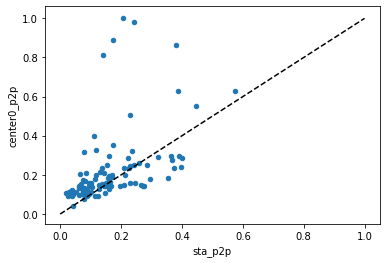

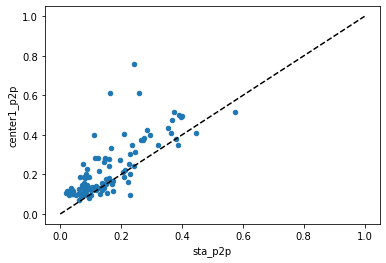

In [3]:
clusters.plot.scatter("sta_p2p", "center0_p2p")
plt.plot([0, 1], [0, 1], 'k--')
clusters.plot.scatter("sta_p2p", "center1_p2p")
plt.plot([0, 1], [0, 1], 'k--')

In [4]:
idx_p2p1_increased = np.where(clusters["sta_p2p"] < clusters["center0_p2p"])
idx_p2p2_increased = np.where(clusters["sta_p2p"] < clusters["center1_p2p"])

clusters.iloc[np.union1d(idx_p2p1_increased, idx_p2p2_increased)]

,channel_name,num_spikes,cell_type,sta_p2p,sta_std,eig1,eig2,eig3,converged,center0_p2p,center0_std,center1_p2p,center1_std,weight1,weight2,inner_product,max_weight
0,ch_12a,23502,ON-OFF,0.029442,0.004639,0.206074,0.203733,0.202872,True,0.102619,0.017286,0.094481,0.016206,0.492473,0.507527,-0.122198,0.507527
1,ch_13a,34412,ON,0.038108,0.004551,0.211586,0.209889,0.207339,True,0.097598,0.015343,0.105389,0.018152,0.506552,0.493448,-0.123712,0.506552
2,ch_13b,9486,ON,0.081927,0.008582,0.235368,0.234161,0.231651,True,0.127193,0.018396,0.127571,0.020052,0.510140,0.489860,-0.113692,0.510140
3,ch_14a,15063,ON,0.024115,0.004346,0.216538,0.214700,0.213073,True,0.093376,0.016826,0.111684,0.017316,0.496572,0.503428,-0.129942,0.503428
4,ch_14b,24682,ON-OFF,0.040920,0.005341,0.210612,0.208580,0.207239,True,0.100461,0.017227,0.101248,0.016930,0.500796,0.499204,-0.120377,0.500796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,ch_86a,8919,OFF,0.293403,0.012538,0.252945,0.249681,0.247357,True,0.178248,0.018478,0.399481,0.023717,0.490169,0.509831,-0.080065,0.509831
102,ch_86b,11686,OFF,0.127718,0.007273,0.225087,0.224298,0.222882,True,0.130070,0.016553,0.217376,0.019755,0.496997,0.503003,-0.116068,0.503003
103,ch_87a,23393,ON-OFF,0.127247,0.007174,0.217824,0.215380,0.214482,True,0.149839,0.018233,0.132311,0.017640,0.490065,0.509935,-0.111965,0.509935
104,ch_87b,4306,ON-OFF,0.083376,0.008343,0.278084,0.276264,0.270771,True,0.127232,0.020869,0.126662,0.019550,0.493796,0.506204,-0.138714,0.506204


In [5]:
clusters.iloc[np.intersect1d(idx_p2p1_increased, idx_p2p2_increased)]

,channel_name,num_spikes,cell_type,sta_p2p,sta_std,eig1,eig2,eig3,converged,center0_p2p,center0_std,center1_p2p,center1_std,weight1,weight2,inner_product,max_weight
0,ch_12a,23502,ON-OFF,0.029442,0.004639,0.206074,0.203733,0.202872,True,0.102619,0.017286,0.094481,0.016206,0.492473,0.507527,-0.122198,0.507527
1,ch_13a,34412,ON,0.038108,0.004551,0.211586,0.209889,0.207339,True,0.097598,0.015343,0.105389,0.018152,0.506552,0.493448,-0.123712,0.506552
2,ch_13b,9486,ON,0.081927,0.008582,0.235368,0.234161,0.231651,True,0.127193,0.018396,0.127571,0.020052,0.510140,0.489860,-0.113692,0.510140
3,ch_14a,15063,ON,0.024115,0.004346,0.216538,0.214700,0.213073,True,0.093376,0.016826,0.111684,0.017316,0.496572,0.503428,-0.129942,0.503428
4,ch_14b,24682,ON-OFF,0.040920,0.005341,0.210612,0.208580,0.207239,True,0.100461,0.017227,0.101248,0.016930,0.500796,0.499204,-0.120377,0.500796
5,ch_14c,1674,OFF,0.063131,0.010345,0.374548,0.359102,0.352098,True,0.143741,0.023064,0.073226,0.011649,0.394146,0.605854,-0.003484,0.605854
6,ch_16a,17370,ON,0.023494,0.004087,0.204920,0.204215,0.203113,True,0.106823,0.016025,0.114516,0.017086,0.501512,0.498488,-0.124135,0.501512
7,ch_16b,4286,ON,0.039687,0.006680,0.264773,0.260863,0.258802,True,0.124448,0.018614,0.119636,0.020446,0.503579,0.496421,-0.149009,0.503579
8,ch_17a,10558,ON-OFF,0.043356,0.005020,0.211599,0.208394,0.207566,True,0.108853,0.017053,0.111618,0.017172,0.504650,0.495350,-0.124286,0.504650
9,ch_17b,7244,ON,0.037127,0.005826,0.240235,0.234276,0.232704,True,0.117826,0.018457,0.132696,0.018210,0.491334,0.508666,-0.137581,0.508666


In [6]:
clusters_with_negative_inner_product = clusters.loc[clusters["inner_product"]<0,:]

print(len(clusters_with_negative_inner_product), len(clusters))
clusters_with_negative_inner_product.sort_values('inner_product').head(20)

89 106


,channel_name,num_spikes,cell_type,sta_p2p,sta_std,eig1,eig2,eig3,converged,center0_p2p,center0_std,center1_p2p,center1_std,weight1,weight2,inner_product,max_weight
75,ch_55b,5218,ON-OFF,0.110111,0.008945,0.319629,0.289982,0.285660,True,0.400553,0.022179,0.400821,0.022344,0.482088,0.517912,-0.172544,0.517912
7,ch_16b,4286,ON,0.039687,0.006680,0.264773,0.260863,0.258802,True,0.124448,0.018614,0.119636,0.020446,0.503579,0.496421,-0.149009,0.503579
83,ch_65b,3033,ON,0.076223,0.008483,0.275589,0.272738,0.269600,True,0.121879,0.019769,0.134436,0.021635,0.508502,0.491498,-0.145171,0.508502
104,ch_87b,4306,ON-OFF,0.083376,0.008343,0.278084,0.276264,0.270771,True,0.127232,0.020869,0.126662,0.019550,0.493796,0.506204,-0.138714,0.506204
63,ch_47c,4680,ON,0.063332,0.006907,0.258002,0.257559,0.253181,True,0.133035,0.019798,0.108263,0.018146,0.517790,0.482210,-0.138367,0.517790
9,ch_17b,7244,ON,0.037127,0.005826,0.240235,0.234276,0.232704,True,0.117826,0.018457,0.132696,0.018210,0.491334,0.508666,-0.137581,0.508666
99,ch_83a,15210,ON-OFF,0.079143,0.005790,0.234655,0.227514,0.226197,True,0.319179,0.020438,0.184874,0.015685,0.476611,0.523389,-0.134163,0.523389
85,ch_68b,3009,ON-OFF,0.087929,0.009749,0.325427,0.316164,0.312361,True,0.126711,0.019017,0.146219,0.023748,0.519963,0.480037,-0.133171,0.519963
96,ch_78b,3044,ON-OFF,0.113383,0.010395,0.302228,0.294525,0.292668,True,0.179436,0.022027,0.124997,0.021225,0.518647,0.481353,-0.131804,0.518647
82,ch_65a,23122,ON-OFF,0.075753,0.005583,0.229706,0.221956,0.220782,True,0.174026,0.016454,0.252770,0.018888,0.500557,0.499443,-0.131429,0.500557


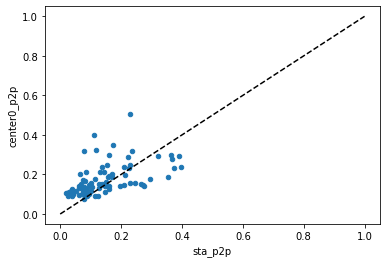

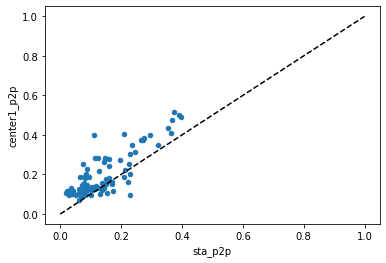

In [7]:
#plt.plot(clusters_with_negative_inner_product[])
clusters_with_negative_inner_product.plot.scatter("sta_p2p", "center0_p2p")
plt.plot([0,1], [0,1], 'k--')
clusters_with_negative_inner_product.plot.scatter("sta_p2p", "center1_p2p")
plt.plot([0,1], [0,1], 'k--')

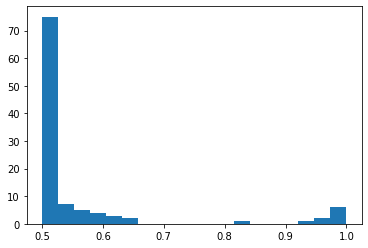

In [8]:
bins = np.linspace(0.5, 1, 20)
plt.hist(clusters["max_weight"], bins=bins)
#clusters["max_weight"].hist()
#plt.
plt.savefig("{}/max_weight_hist.png".format(folder_name))

In [9]:
# clusters["inner_product"].hist()
# plt.savefig("{}/inner_product_hist.png".format(folder_name))

### histogram of  innerproduct for each cell type

In [10]:
## Combine with cell type info
# cell_type = pd.DataFrame({"channel_name": info["channel_names"],
#                           "cell_type":   info["cell_types"]})
# cell_type

# clusters = clusters.merge(cell_type, on="channel_name", how="outer")

# filename = os.path.join(folder_name, "clusters_combined.csv")
# clusters.to_csv(filename, index=None)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe997a4f90>,
      dtype=object)

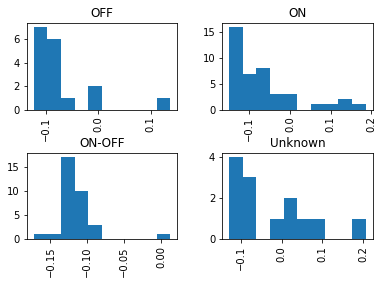

In [11]:
# clusters
#info["cell_types"]
#clusters.groupby("cell_type").hist()
clusters["inner_product"].hist(by=clusters["cell_type"])

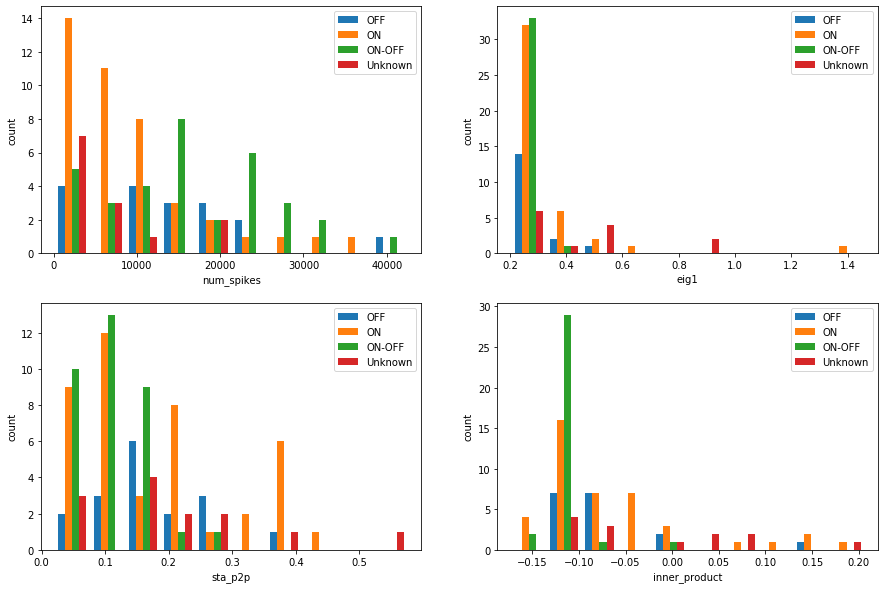

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(221)
# pysta.plot_histogram_by_cell_type(clusters, "num_spikes")
pysta.plot_hist_by_group(clusters, "num_spikes", 'cell_type')
plt.subplot(222)
# pysta.plot_histogram_by_cell_type(clusters, "eig1")
pysta.plot_hist_by_group(clusters, "eig1", 'cell_type')
plt.subplot(223)
# pysta.plot_histogram_by_cell_type(clusters, "PSNR")
pysta.plot_hist_by_group(clusters, "sta_p2p", 'cell_type')
plt.subplot(224)
pysta.plot_hist_by_group(clusters, "inner_product", 'cell_type')
# pysta.plot_histogram_by_cell_type(clusters, "inner_product")
# pysta.plot_histogram_by_cell_type(clusters, "max_weight")

plt.savefig("figure/{}_tap{}_cluster_dim{}_stat.pdf".format(contrast, tap, cluster_dim))
plt.savefig("figure/{}_tap{}_cluster_dim{}_stat.png".format(contrast, tap, cluster_dim))

## Focus on data with enough samples

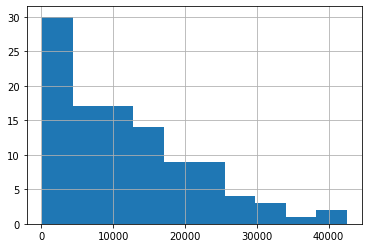

In [13]:
clusters.num_spikes.hist()

88
ON         34
ON-OFF     33
OFF        15
Unknown     6
Name: cell_type, dtype: int64


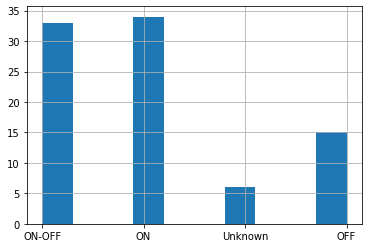

In [14]:
idx_enough_samples = clusters["num_spikes"]>512*4
clusters_with_enough_samples = clusters.loc[idx_enough_samples]

print(len(clusters_with_enough_samples))

print(clusters_with_enough_samples["cell_type"].value_counts())

clusters_with_enough_samples["cell_type"].hist()

In [15]:
idx_unknown = clusters_with_enough_samples["cell_type"]=="unknown"

clusters_with_enough_samples.loc[idx_unknown]

# clusters_with_enough_samples.loc[idx_unknown].to_csv("{}_tap{}_cluster_with_enough_samples_dim{}_unknown.csv".format(dataset_name, tap, dim))

,channel_name,num_spikes,cell_type,sta_p2p,sta_std,eig1,eig2,eig3,converged,center0_p2p,center0_std,center1_p2p,center1_std,weight1,weight2,inner_product,max_weight


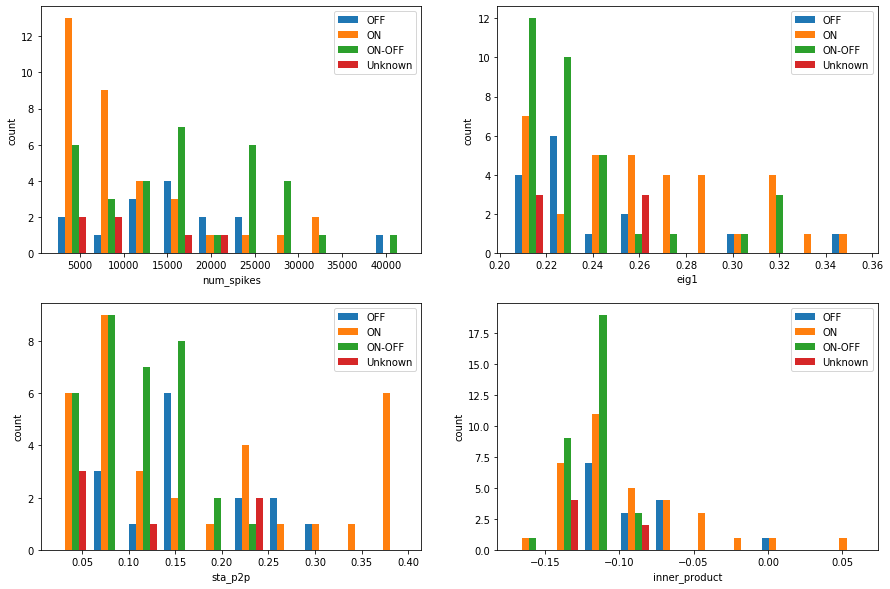

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(221)
pysta.plot_hist_by_group(clusters_with_enough_samples, "num_spikes", 'cell_type')
plt.subplot(222)
pysta.plot_hist_by_group(clusters_with_enough_samples, "eig1", 'cell_type')
plt.subplot(223)
pysta.plot_hist_by_group(clusters_with_enough_samples, "sta_p2p", 'cell_type')
plt.subplot(224)
pysta.plot_hist_by_group(clusters_with_enough_samples, "inner_product", 'cell_type')

plt.savefig("figure/{}_tap{}_cluster_dim{}_enough_samples_stat.pdf".format(contrast, tap, cluster_dim))
plt.savefig("figure/{}_tap{}_cluster_dim{}_enough_samples_stat.png".format(contrast, tap, cluster_dim))

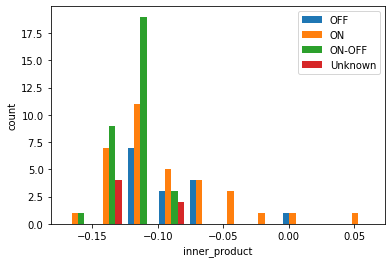

In [17]:
# plot inner product only
pysta.plot_hist_by_group(clusters_with_enough_samples, "inner_product", 'cell_type')
# pysta.plot_histogram_by_cell_type(clusters_with_enough_samples, "inner_product")
# plt.savefig("figure/{}_tap{}_cluster_dim{}_inner_product_hist.png".format(dataset_name, tap, cluster_dim))
# plt.savefig("figure/{}_tap{}_cluster_dim{}_inner_product_hist.pdf".format(dataset_name, tap, cluster_dim))

## paired t-test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

In [18]:
# from scipy import stats

In [19]:
# stats.ttest_rel(clusters_dim2["max_weight"], clusters_dim2["max_weight"])

In [20]:
# stats.ttest_rel(clusters_dim2["inner_product"], clusters_dim2["inner_product"])